In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend


import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import nltk
from six import string_types
from nltk.corpus import reuters
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
import numpy as np

nltk.download('reuters') # Downloading corpus
nltk.download('stopwords') # Downloading stopwords
nltk.download('punkt') # Downloading tokenizer

from nltk.corpus import reuters
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import PCA
import re
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier

import requests
from bs4 import BeautifulSoup
import os

from textblob import TextBlob

import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
import tensorflow
import random
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import   Masking, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import zipfile

from sklearn.utils import shuffle
import unicodedata
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Flatten
from tensorflow.keras.models import Sequential, load_model
from nltk.stem.wordnet import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,  SpatialDropout1D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import  Masking

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Embedding, Dropout
import glob
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from zipfile import ZipFile

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package reuters to /home/deploy/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to /home/deploy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/deploy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/deploy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
pd.options.display.float_format = '{:8f}'.format

## 1 What are the different proceedures or techniques to convert textual data into meaningful vector representation?Explain any two proccedures. (Marks 1 + 1.5 + 1.5)

## 2 What is a Document Term Matrix? Explain with an example.What are the drawbacks of Document Term Matrix?(Marks 1 + 2 + 1)

# Q3: Expalin TF-IDF.

## 4 What is Word-Cloud?What are the drawbacks of Word-Cloud? (Marks 2+2 = 4)

## 5 What is N-gram? Explain with an example.Where can we apply N-gram in the context of Natural Language Processing. (Marks 1 + 2 + 1)

# 6 Use the NLP_model.csv data.The “review” column contains the review of several e-shopping items and the “Star” column contains the rating given by the customers.

## 6.i Add a column named ‘Emotion’ if the “Star” i.e the rating column  is more than 3 mention ‘positive’ otherwise ‘negative’ (Marks – 2)

In [3]:
df = pd.read_csv('data_set.csv')
df.head()

,Review,Star
0,A must have product. Everything about this pro...,4.200000
1,Today I received the shadow palette and I like...,5.000000
2,The eyeshadow is pretty good quality for the p...,1.000000
3,Considering the product looks little different...,5.000000
4,Loved the product quality wrt price... the pig...,4.000000


## 6.ii Clean & Preprocess the “review”  data as required.(Marks – 8)

In [4]:
txt = list(df['Review'])
txt

['A must have product. Everything about this product from its packaging, the pallate box to the shades is superb.I wanted to order only from the Swiss Beauty seller and they really did a very good job. Thank you Swiss Beauty...',
 "Today I received the shadow palette and I like the colors. It has a mix of matte with glossy colors. They pigment well and it is not so dusty. The only thing I did not like and that's why I gave 4 stars, was receiving with the lid broken and it was to be expected since it did not have any protector or something to avoid this, it came in a simple plastic bag.",
 'The eyeshadow is pretty good quality for the price. The colors are useful for pinkish, nude make-up and well blended. Color development after application is pretty good as well. Overall I am satisfied with item for the price but the case was delivered broken.',
 'Considering the product looks little different in actual than in images shown, I didn’t pay much attention only to find out that all in all

In [5]:
from nltk.tokenize import RegexpTokenizer
token = []
for i in txt:
    token.append(RegexpTokenizer('\w+').tokenize(i))
token

[['A',
  'must',
  'have',
  'product',
  'Everything',
  'about',
  'this',
  'product',
  'from',
  'its',
  'packaging',
  'the',
  'pallate',
  'box',
  'to',
  'the',
  'shades',
  'is',
  'superb',
  'I',
  'wanted',
  'to',
  'order',
  'only',
  'from',
  'the',
  'Swiss',
  'Beauty',
  'seller',
  'and',
  'they',
  'really',
  'did',
  'a',
  'very',
  'good',
  'job',
  'Thank',
  'you',
  'Swiss',
  'Beauty'],
 ['Today',
  'I',
  'received',
  'the',
  'shadow',
  'palette',
  'and',
  'I',
  'like',
  'the',
  'colors',
  'It',
  'has',
  'a',
  'mix',
  'of',
  'matte',
  'with',
  'glossy',
  'colors',
  'They',
  'pigment',
  'well',
  'and',
  'it',
  'is',
  'not',
  'so',
  'dusty',
  'The',
  'only',
  'thing',
  'I',
  'did',
  'not',
  'like',
  'and',
  'that',
  's',
  'why',
  'I',
  'gave',
  '4',
  'stars',
  'was',
  'receiving',
  'with',
  'the',
  'lid',
  'broken',
  'and',
  'it',
  'was',
  'to',
  'be',
  'expected',
  'since',
  'it',
  'did',
  'not

In [6]:
low = []
for i in token:
    for j in i:
        low.append(j.lower())
low

['a',
 'must',
 'have',
 'product',
 'everything',
 'about',
 'this',
 'product',
 'from',
 'its',
 'packaging',
 'the',
 'pallate',
 'box',
 'to',
 'the',
 'shades',
 'is',
 'superb',
 'i',
 'wanted',
 'to',
 'order',
 'only',
 'from',
 'the',
 'swiss',
 'beauty',
 'seller',
 'and',
 'they',
 'really',
 'did',
 'a',
 'very',
 'good',
 'job',
 'thank',
 'you',
 'swiss',
 'beauty',
 'today',
 'i',
 'received',
 'the',
 'shadow',
 'palette',
 'and',
 'i',
 'like',
 'the',
 'colors',
 'it',
 'has',
 'a',
 'mix',
 'of',
 'matte',
 'with',
 'glossy',
 'colors',
 'they',
 'pigment',
 'well',
 'and',
 'it',
 'is',
 'not',
 'so',
 'dusty',
 'the',
 'only',
 'thing',
 'i',
 'did',
 'not',
 'like',
 'and',
 'that',
 's',
 'why',
 'i',
 'gave',
 '4',
 'stars',
 'was',
 'receiving',
 'with',
 'the',
 'lid',
 'broken',
 'and',
 'it',
 'was',
 'to',
 'be',
 'expected',
 'since',
 'it',
 'did',
 'not',
 'have',
 'any',
 'protector',
 'or',
 'something',
 'to',
 'avoid',
 'this',
 'it',
 'came',
 'in'

In [7]:
from nltk.corpus import stopwords 
stop_words=set(stopwords.words('english'))

In [8]:
token_final=[]
for i in low:
    if i not in stop_words:
        token_final.append(i)
token_final

['must',
 'product',
 'everything',
 'product',
 'packaging',
 'pallate',
 'box',
 'shades',
 'superb',
 'wanted',
 'order',
 'swiss',
 'beauty',
 'seller',
 'really',
 'good',
 'job',
 'thank',
 'swiss',
 'beauty',
 'today',
 'received',
 'shadow',
 'palette',
 'like',
 'colors',
 'mix',
 'matte',
 'glossy',
 'colors',
 'pigment',
 'well',
 'dusty',
 'thing',
 'like',
 'gave',
 '4',
 'stars',
 'receiving',
 'lid',
 'broken',
 'expected',
 'since',
 'protector',
 'something',
 'avoid',
 'came',
 'simple',
 'plastic',
 'bag',
 'eyeshadow',
 'pretty',
 'good',
 'quality',
 'price',
 'colors',
 'useful',
 'pinkish',
 'nude',
 'make',
 'well',
 'blended',
 'color',
 'development',
 'application',
 'pretty',
 'good',
 'well',
 'overall',
 'satisfied',
 'item',
 'price',
 'case',
 'delivered',
 'broken',
 'considering',
 'product',
 'looks',
 'little',
 'different',
 'actual',
 'images',
 'shown',
 'pay',
 'much',
 'attention',
 'find',
 'totally',
 'different',
 'eye',
 'pallet',
 'cover',


In [9]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [10]:
stemmed=[]
for i in token:
    lines=list(map(lambda x:porter.stem(x),i))
    stemmed.append(lines)
print(len(stemmed[0]))

41


In [11]:
print(stemmed[0])

['a', 'must', 'have', 'product', 'everyth', 'about', 'thi', 'product', 'from', 'it', 'packag', 'the', 'pallat', 'box', 'to', 'the', 'shade', 'is', 'superb', 'i', 'want', 'to', 'order', 'onli', 'from', 'the', 'swiss', 'beauti', 'seller', 'and', 'they', 'realli', 'did', 'a', 'veri', 'good', 'job', 'thank', 'you', 'swiss', 'beauti']


In [ ]:
lancaster = WordNetLemmatizer()
lemmitized=[]
for i in stemmed:
    lines=list(map(lambda x:lancaster.lemmatize(x),i))
    stemmed.append(lines)
print(len(stemmed[0]))

In [ ]:
print(lemmitized[0])

# 7.Sentiment Analysis (Marks : 10)

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
alayzer = SentimentIntensityAnalyzer()

### Part 1 : Convert the available content into a dataframe and remove the null data

In [14]:
df1 = df.dropna()
df1

,Review,Star
0,A must have product. Everything about this pro...,4.200000
1,Today I received the shadow palette and I like...,5.000000
2,The eyeshadow is pretty good quality for the p...,1.000000
3,Considering the product looks little different...,5.000000
4,Loved the product quality wrt price... the pig...,4.000000
5,"Item received is same as shown in image, manuf...",4.000000
6,Nice pallet...I just introduced my self to mak...,4.000000
7,I loved this product it met my expectations in...,4.000000
8,It is a best eyeshadow in a very cheap price I...,1.000000
9,"The eyeshadows are extremely pigmented, they g...",1.000000


### Part 2 : Assign the subjetivity response to the content

In [15]:
Emotions = []
for i in df1['Star']:
    if i>3:
        Emotions.append('Positive')
    else:
        Emotions.append('Negative') 
        
df1['Emotions']= Emotions
df1.head()

,Review,Star,Emotions
0,A must have product. Everything about this pro...,4.200000,Positive
1,Today I received the shadow palette and I like...,5.000000,Positive
2,The eyeshadow is pretty good quality for the p...,1.000000,Negative
3,Considering the product looks little different...,5.000000,Positive
4,Loved the product quality wrt price... the pig...,4.000000,Positive


### Part 3 : Assign the polarity response to the content

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
alayzer = SentimentIntensityAnalyzer()

In [17]:
df1["score"]=df1["Review"].apply(lambda s:alayzer.polarity_scores(s)['compound'])
df1.head()

,Review,Star,Emotions,score
0,A must have product. Everything about this pro...,4.200000,Positive,0.875600
1,Today I received the shadow palette and I like...,5.000000,Positive,0.202300
2,The eyeshadow is pretty good quality for the p...,1.000000,Negative,0.709600
3,Considering the product looks little different...,5.000000,Positive,-0.226300
4,Loved the product quality wrt price... the pig...,4.000000,Positive,-0.458800


### Part 4 : Assing sentiment to the content

In [18]:
senti = []
for i in df1['score']:
    if i>0:
        senti.append('positive')
    else:
        senti.append('Negative') 
        
df1['sentiment']= senti
df1.head()

,Review,Star,Emotions,score,sentiment
0,A must have product. Everything about this pro...,4.200000,Positive,0.875600,positive
1,Today I received the shadow palette and I like...,5.000000,Positive,0.202300,positive
2,The eyeshadow is pretty good quality for the p...,1.000000,Negative,0.709600,positive
3,Considering the product looks little different...,5.000000,Positive,-0.226300,Negative
4,Loved the product quality wrt price... the pig...,4.000000,Positive,-0.458800,Negative


### Part 5 : Assign Polarity to the entire content

In [19]:
df1["entire_score"]=df1["Review"].apply(lambda s:alayzer.polarity_scores(s)['compound'])
df1.head()

,Review,Star,Emotions,score,sentiment,entire_score
0,A must have product. Everything about this pro...,4.200000,Positive,0.875600,positive,0.875600
1,Today I received the shadow palette and I like...,5.000000,Positive,0.202300,positive,0.202300
2,The eyeshadow is pretty good quality for the p...,1.000000,Negative,0.709600,positive,0.709600
3,Considering the product looks little different...,5.000000,Positive,-0.226300,Negative,-0.226300
4,Loved the product quality wrt price... the pig...,4.000000,Positive,-0.458800,Negative,-0.458800


### Part 6 : Visualize the frequency distribution of the sentiment on each content

In [20]:
import matplotlib.pyplot as plt

(array([ 29.,  36.,  39.,  39.,  27.,  70.,  50., 111., 157., 244.]),
 array([-0.9998 , -0.79984, -0.59988, -0.39992, -0.19996,  0.     ,
         0.19996,  0.39992,  0.59988,  0.79984,  0.9998 ]),
 <a list of 10 Patch objects>)

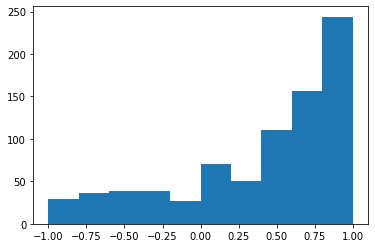

In [21]:
plt.hist(df1.entire_score)

In [22]:
df1.sentiment.value_counts()

positive    589
Negative    213
Name: sentiment, dtype: int64

In [23]:
df1.score.mean()

0.4012447630922695